In [22]:
from keras.datasets import boston_housing
import numpy as np
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [4]:
x_train.shape

(404, 13)

In [5]:
y_train.shape

(404,)

In [21]:
boston_labels = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
len(boston_labels)

13

In [23]:
df = pd.DataFrame(x_train, columns=boston_labels)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [9]:
y_train[0]

15.2

<AxesSubplot: ylabel='Frequency'>

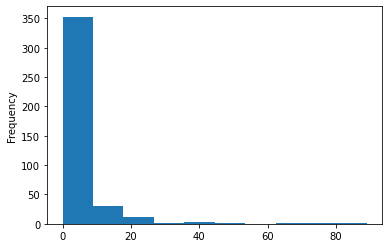

In [31]:
df["CRIM"].plot(kind="hist")

In [38]:
mean = x_train.mean(axis=0)
x_train -= mean

In [40]:
std = x_train.std(axis=0)
x_train /= std

In [41]:
x_test -= mean
x_test /= std

In [48]:
x_train.shape[1]

13

In [46]:
from keras import models
from keras import layers

In [53]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(x_train.shape[1], )))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [100]:
K = 4
sample_size = x_train // K
num_of_epochs = 500
scores = []
histories = []

### K-FOLD VALIDATION

In [101]:
def concatanate_parts_except_validation_part(parts, k, exclude):
    parts_to_concat = [part for i, part in enumerate(parts) if i != exclude]
    return np.concatenate(parts_to_concat, axis=0)


In [102]:
x_train_parts = np.split(x_train, K)
y_train_parts = np.split(y_train, K)

for i in range(K):
    print("Processing Fold: {0}".format(i))
    x_validation = x_train_parts[i]
    y_validation = y_train_parts[i]
    
    x_train_partial = concatanate_parts_except_validation_part(x_train_parts, K, i)
    y_train_partial = concatanate_parts_except_validation_part(y_train_parts, K, i)

    model = build_model()
    history = model.fit(x_train_partial, y_train_partial, epochs=num_of_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(x_validation, y_validation, verbose=0)

    scores.append(val_mae)
    histories.append(history.history)
    


Processing Fold: 0
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3


In [114]:
con_arr = np.concatenate(tuple(list(map(lambda history: history["mae"], histories)))).reshape(-1, 500)

In [126]:
average_mae_history = np.mean(con_arr, axis=0)

In [120]:
scores

[2.3469719886779785, 3.132634162902832, 2.4536004066467285, 2.690953254699707]

In [99]:
np.mean(scores)

2.53579843044281

In [128]:
import matplotlib.pyplot as plt 

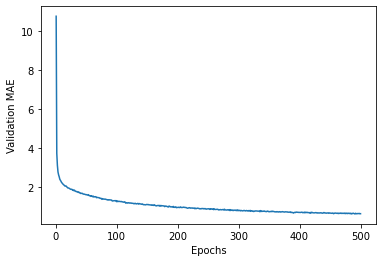

In [135]:
plt.plot(range(1, 1 + len(average_mae_history)), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [145]:
model = build_model()
model.fit(x_train, y_train,
epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 17.4177 - mae: 2.6329


In [146]:
test_mae_score

2.6328556537628174